# The field of economists on DBpedia

In [1]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import sparql_dataframe
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats
import pandas as pd
from collections import Counter
from operator import itemgetter


In [31]:
query = """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT DISTINCT ?economist ?name (year(xsd:dateTime(?Birth_Date)) AS ?year) ?field

WHERE
     {
        {?economist ?propriety dbr:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
        ?economist dbp:field ?field1 .
        
  BIND(STRAFTER(STR(?field1),"http://dbpedia.org/resource/") AS ?field2)
  BIND(REPLACE(STR(?field2),"[_]"," ") AS ?field)

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        FILTER (CONTAINS(?name, " "))
        }
     UNION
        {
         ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbp:field ?field1 .
        
  BIND(STRAFTER(STR(?field1),"http://dbpedia.org/resource/") AS ?field2)
  BIND(REPLACE(STR(?field2),"[_]"," ") AS ?field)
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        }
        UNION
       {
        ?economist a dbo:Professor .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
        ?economist dbp:field ?field1 .
        
  BIND(STRAFTER(STR(?field1),"http://dbpedia.org/resource/") AS ?field2)
  BIND(REPLACE(STR(?field2),"[_]"," ") AS ?field)
        FILTER (CONTAINS(?abstract, "Economist") || CONTAINS(?abstract, "economist") || CONTAINS(?abstract, "économiste")  || CONTAINS(?abstract, "Économiste"))
        FILTER (CONTAINS(?name, " "))
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
       }
       UNION
       {
        ?economist a dbo:Person .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
               ?economist dbp:field ?field1 .
        
  BIND(STRAFTER(STR(?field1),"http://dbpedia.org/resource/") AS ?field2)
  BIND(REPLACE(STR(?field2),"[_]"," ") AS ?field)
        FILTER (CONTAINS(?name, " "))
        FILTER (CONTAINS(?abstract, "Economist") || CONTAINS(?abstract, "economist") || CONTAINS(?abstract, "économiste")  || CONTAINS(?abstract, "Économiste"))

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
  }
     }
"""

In [3]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

In [4]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [5]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [6]:
# Number of rows in the result
len(rc['results']['bindings'])

1561

In [7]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_von_Mises'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig von Mises'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1881'}, 'field': {'type': 'literal', 'value': 'Political economy'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_von_Mises'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig von Mises'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1881'}, 'field': {'type': 'literal', 'value': 'Logic'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_von_Mises'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig von Mises'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1881'}, 'field': {'type': 'literal', 'value': 'Libertarianism'}}
{'economist': {'typ

In [30]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 30:
        try: 
            name = l['name']['value']
            print([l['economist']['value'],name,l['field']['value'], l['year']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['economist']['value'],name,l['field']['value'],l['year']['value']])
            except :
                print([l['economist']['value'],'',l['field']['value'], l['year']['value']])

        i += 1

['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Political economy', '1881']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Logic', '1881']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Libertarianism', '1881']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Economics', '1881']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Rationalism', '1881']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Philosophy of science', '1881']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Classical liberalism', '1881']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Epistemology', '1881']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Methodology', '1881']
['http://dbpedia.org/resource/Luigi_Amoroso', 'Luigi Amoroso', 'Microeconomics', '1886']
['http://dbpedia.org/resource/Luigi_Pasinetti', 'Luigi Pasinet

In [10]:
# Explore
fieldList = []
for l in rc['results']['bindings']:
    fieldList.append(l['field']['value'])

In [11]:
# Count the fields
counterFieldList = Counter(fieldList)
groupedFieldList = sorted(list(zip(counterFieldList.values(), counterFieldList.keys())), reverse=True)
groupedFieldList

[(210, ''),
 (147, 'Economics'),
 (122, 'Macroeconomics'),
 (92, 'Political economy'),
 (71, 'Econometrics'),
 (41, 'Financial economics'),
 (41, 'Development economics'),
 (40, 'Microeconomics'),
 (39, 'Monetary economics'),
 (32, 'International economics'),
 (30, 'Labour economics'),
 (27, 'Public economics'),
 (27, 'Behavioral economics'),
 (26, 'Economic history'),
 (23, 'Game theory'),
 (20, 'Industrial organization'),
 (16, 'Mathematical economics'),
 (15, 'Political science'),
 (13, 'Experimental economics'),
 (12, 'Finance'),
 (11, 'Socioeconomics'),
 (11, 'Institutional economics'),
 (11, 'History of economic thought'),
 (11, 'Health economics'),
 (11, 'Environmental economics'),
 (11, 'Economist'),
 (10, 'Law and economics'),
 (10, 'Economic growth'),
 (10, 'Agricultural economics'),
 (8, 'Urban economics'),
 (8, 'Statistics'),
 (8, 'Sociology'),
 (8, 'Public finance'),
 (8, 'Mathematics'),
 (7, 'Welfare economics'),
 (7, 'Regional science'),
 (7, 'International trade'),
 (6,

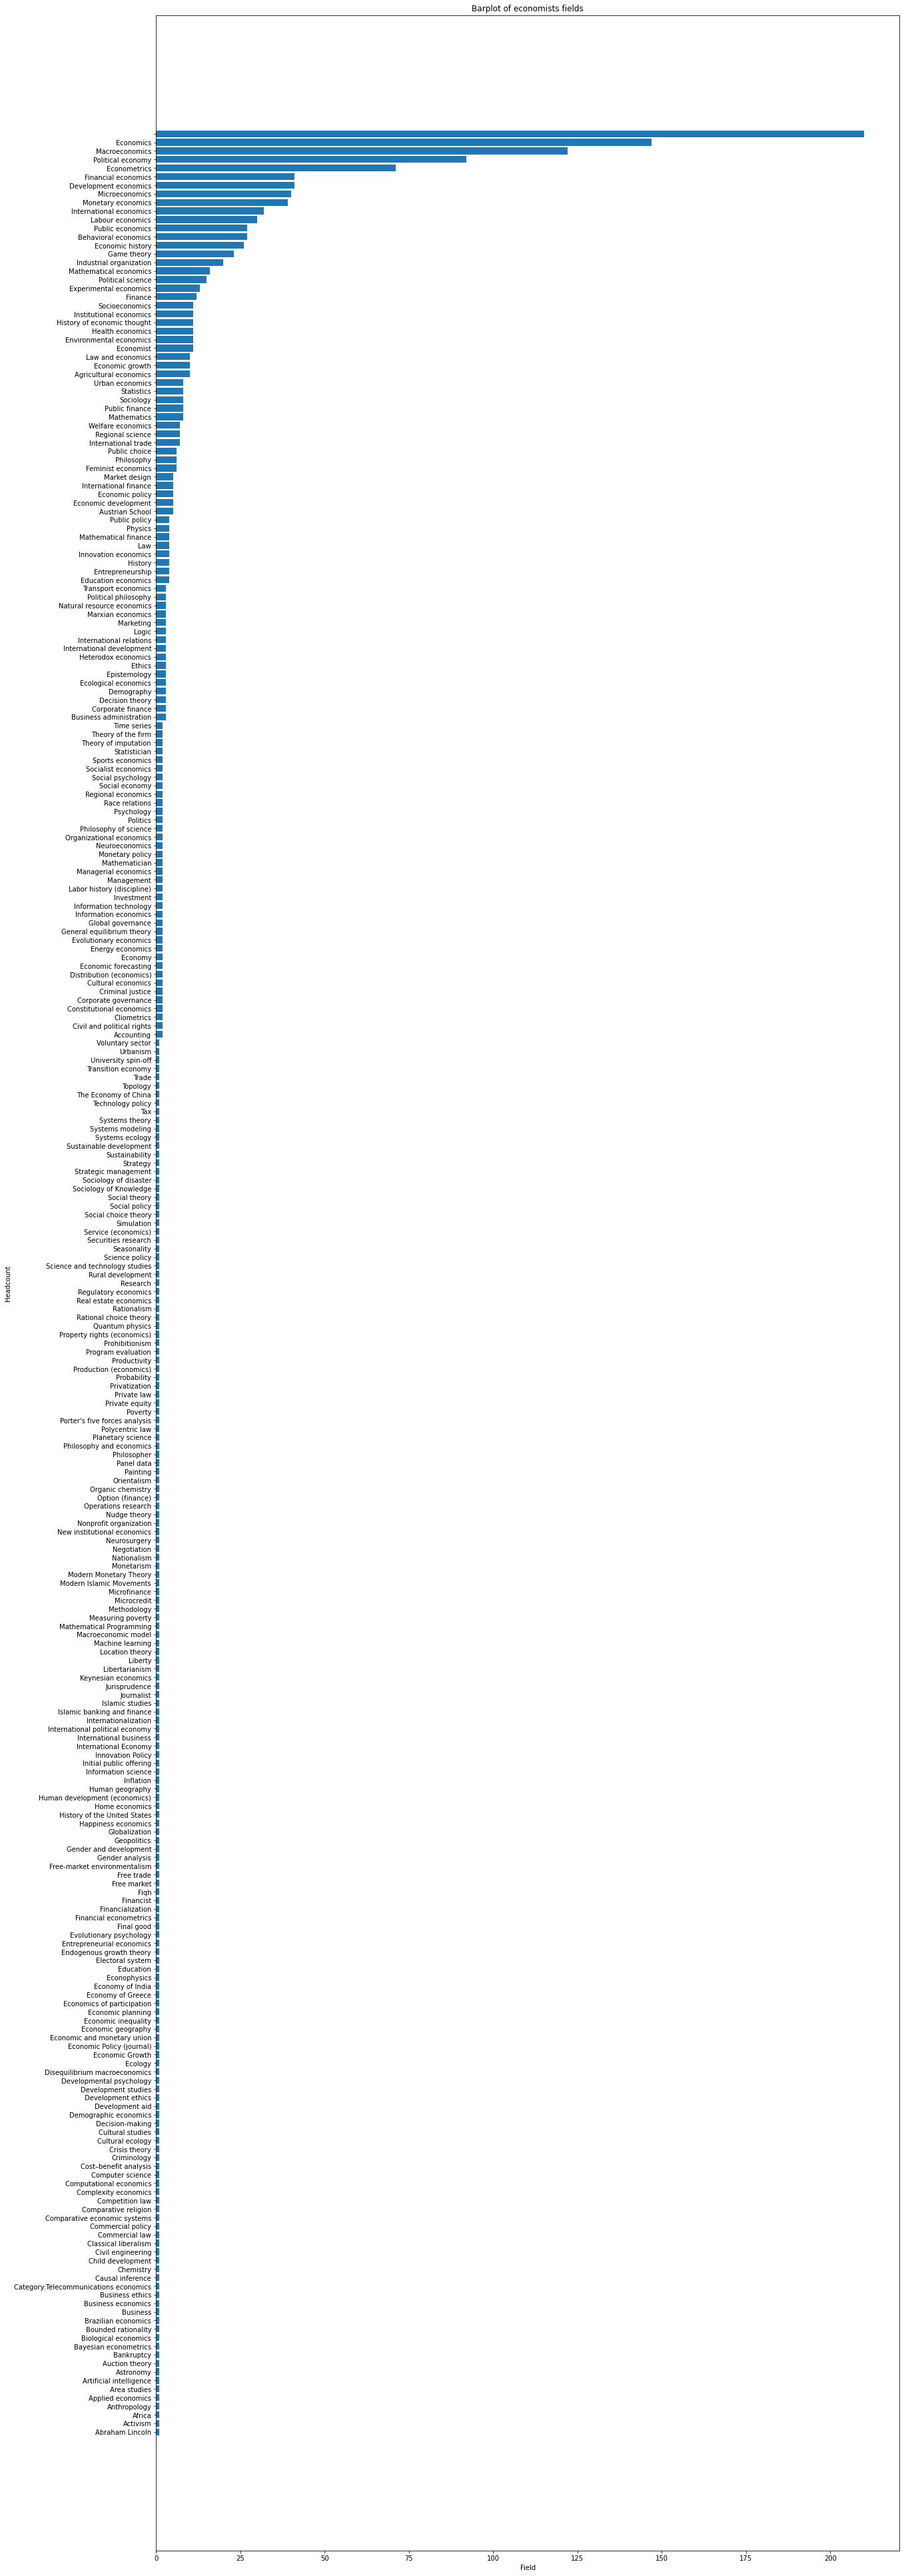

In [29]:
# Barplot of economists fields
eff = [l[1] for l in groupedFieldList]
objects = [l[0] for l in groupedFieldList]

p1 = plt.barh(eff, objects)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of economists fields')
plt.gcf().set_size_inches(20, 70)
plt.yticks(rotation="horizontal")
p1 = plt.figure(1, [20, 3])

# Change of fontsize and angle of xticklabels
plt.gca().invert_yaxis()
plt.show()

In [14]:
bGFL=groupedFieldList[:30]

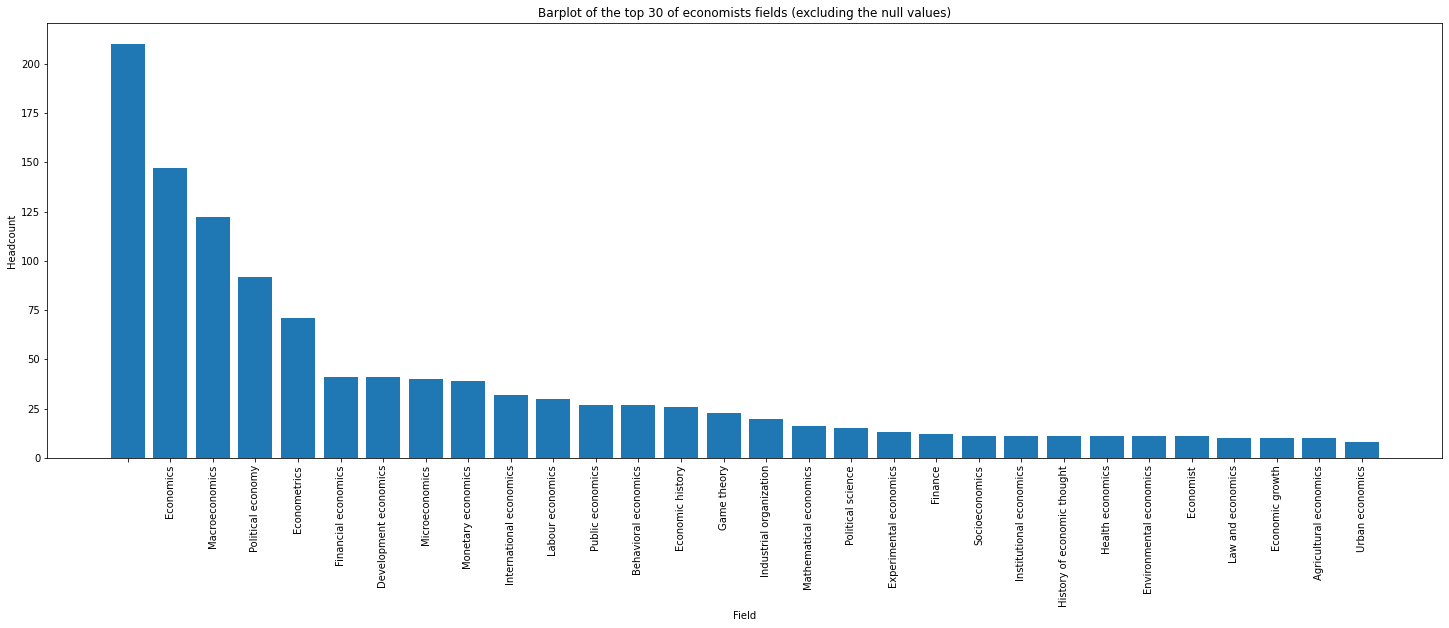

In [18]:
# Barplot of the top 30 of economists fields
eff1 = [l[1] for l in bGFL]
objects1 = [l[0] for l in bGFL]

p1 = plt.bar(eff1, objects1)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of the top 30 of economists fields')
plt.gcf().set_size_inches(25, 8)
plt.xticks(rotation="vertical")

p1 = plt.figure(1, [20, 8])

plt.show()

In [19]:
bGFL=groupedFieldList[1:30]

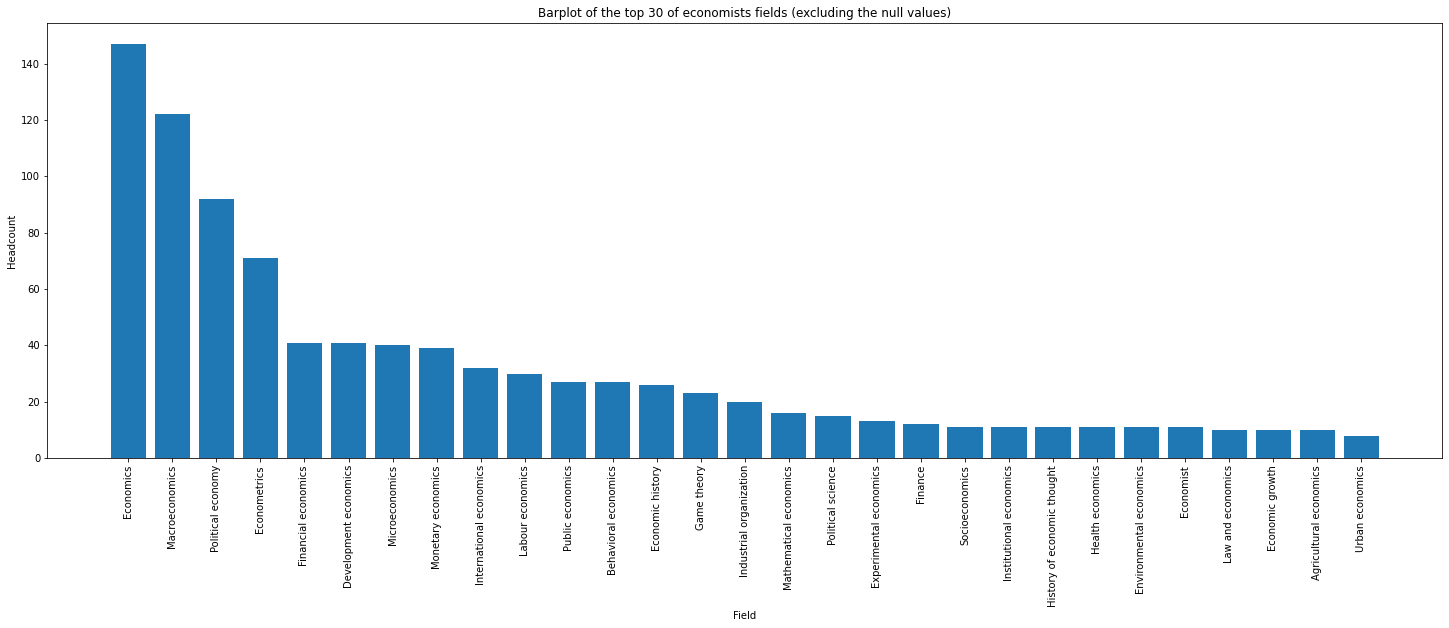

In [20]:
# Barplot of the top 30 of economists fields
eff1 = [l[1] for l in bGFL]
objects1 = [l[0] for l in bGFL]

p1 = plt.bar(eff1, objects1)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of the top 30 of economists fields (excluding the null values)')
plt.gcf().set_size_inches(25, 8)
plt.xticks(rotation="vertical")

p1 = plt.figure(1, [20, 8])

plt.show()